# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [240]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/09. Project (Traffic Sign Classifier)/test.p"
validation_file= "/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/09. Project (Traffic Sign Classifier)/valid.p"
testing_file = "/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/09. Project (Traffic Sign Classifier)/train.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']                ##### uint8  (-1, 32,32,3)
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [17]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import pandas as pd
import numpy as np

signnames = pd.read_csv("signnames.csv")

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = signnames.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 12630
Number of testing examples = 34799
Image data shape = (32, 32, 3)
Number of classes = 43


/home/tk/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


[  60.  720.  750.  450.  660.  630.  150.  450.  450.  480.  660.  420.
  690.  720.  270.  210.  150.  360.  390.   60.   90.   90.  120.  150.
   90.  480.  180.   60.  150.   90.  150.  270.   60.  210.  120.  390.
  120.   60.  690.   90.   90.   60.   90.] <a list of 43 Patch objects>


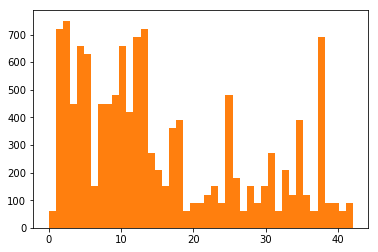

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(y_train, bins=43)                    # <===
fig.show()
n, bins, patches = ax.hist(y_train, bins=43) # <===
print(n, patches)    


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

import os, glob
import numpy as np
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import backend as K
import numpy as np
K.set_image_dim_ordering('tf')    # tf = TensorFlow (samples, row, column, channels) , th = Theano (samples, channels, row, column)



Using TensorFlow backend.


In [5]:
X_train.shape

(12630, 32, 32, 3)

In [241]:
# if you have alread have YUV AdHist data, Load data and Skip the process

X_train_YUV_his = np.load('./YUV_AdHist_Original/X_train_YUV_his.npy')
X_valid_YUV_his = np.load('./YUV_AdHist_Original/X_valid_YUV_his.npy')
X_test_YUV_his  = np.load('./YUV_AdHist_Original/X_test_YUV_his.npy')


In [ ]:
# Skip to ===>

In [7]:
# YUV Normalization convert:  0-1 scale  X_train.max(), X_train.min()
# YUV Adaptive Histgram convert: 

from skimage import exposure

# Conver to YUV 1 channel(Y)
YUV_converter = np.array([.299, .587, .114]).reshape(3,1)

X_train_YUV = np.array(X_train)
X_valid_YUV = np.array(X_valid)
X_test_YUV = np.array(X_test)

X_train_YUV = ( np.dot(X_train.reshape(-1,3), YUV_converter) / 255.0 )
X_valid_YUV = ( np.dot(X_valid.reshape(-1,3), YUV_converter) / 255.0 )
X_test_YUV = ( np.dot(X_test.reshape(-1,3), YUV_converter) / 255.0 )

X_train_YUV = X_train_YUV.reshape(-1,32,32)
X_valid_YUV = X_valid_YUV.reshape(-1,32,32)
X_test_YUV = X_test_YUV.reshape(-1,32,32)

X_train_YUV_his = np.zeros(X_train_YUV.shape)
X_valid_YUV_his = np.zeros(X_valid_YUV.shape)
X_test_YUV_his = np.zeros(X_test_YUV.shape)

# Localized Histogram Localization  
for i in range(X_train_YUV.shape[0]):
    X_train_YUV_his[i] = exposure.equalize_adapthist(X_train_YUV[i])
for i in range(X_valid_YUV.shape[0]):
    X_valid_YUV_his[i] = exposure.equalize_adapthist(X_valid_YUV[i])
for i in range(X_test_YUV.shape[0]):
    X_test_YUV_his[i] = exposure.equalize_adapthist(X_test_YUV[i])      
  
X_train_YUV_his = X_train_YUV_his.reshape(-1,32,32,1)
X_valid_YUV_his = X_valid_YUV_his.reshape(-1,32,32,1)
X_test_YUV_his = X_test_YUV_his.reshape(-1,32,32,1)


/home/tk/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [8]:
print(X_train_YUV_his.max())
print(X_train_YUV_his.min())

1.0
0.0


In [22]:
# Save original YUV AdHist data

import os
path = './YUV_AdHist_Original'
if not os.path.exists(path):
    os.mkdir(path)

np.save('./YUV_AdHist_Original/X_train_YUV_his.npy', X_train_YUV_his)
np.save('./YUV_AdHist_Original/X_valid_YUV_his.npy', X_valid_YUV_his)
np.save('./YUV_AdHist_Original/X_test_YUV_his.npy', X_test_YUV_his)


In [ ]:
# ===> skip

In [242]:
# Augmentation

import numpy as np
from keras.preprocessing.image import ImageDataGenerator

generator = [ImageDataGenerator(rotation_range=3.,
                                width_shift_range=0.01,
                                height_shift_range=0.01,
                                zoom_range=0.05),
             ImageDataGenerator(rotation_range=4.,
                                width_shift_range=0.02,
                                height_shift_range=0.02,
                                zoom_range=0.05),
             ImageDataGenerator(rotation_range=5.,
                                width_shift_range=0.03,
                                height_shift_range=0.03,
                                zoom_range=0.05),
             ImageDataGenerator(rotation_range=6.,
                                width_shift_range=0.04,
                                height_shift_range=0.04,
                                zoom_range=0.05),
             ImageDataGenerator(rotation_range=7.,
                                width_shift_range=0.05,
                                height_shift_range=0.05,
                                zoom_range=0.08),
             ImageDataGenerator(rotation_range=4.,
                                zoom_range=0.05),
             ImageDataGenerator(width_shift_range=0.02, 
                                height_shift_range=0.02,
                                zoom_range=0.05),
             ImageDataGenerator(shear_range=0.10,),
            ]

X_aug = []
y_aug = []

def generate(gen):
    datagen = gen
    b_size = 1
    datagen.fit(X_train_YUV_his)
    g = datagen.flow(X_train_YUV_his, y_train, batch_size=b_size)

    for i in range(len(X_train_YUV_his)):
        X_batch_add, y_batch_add = g.next()
        X_aug.append(X_batch_add)
        y_aug.append(y_batch_add)

for i in range(len(generator)):
    generate(generator[i])

X_train_YUV_his_aug = np.array(X_aug)
y_train_YUV_his_aug = np.array(y_aug)
    
X_train_YUV_his_aug = X_train_YUV_his_aug.reshape(-1,32,32,1)
y_train_YUV_his_aug = y_train_YUV_his_aug.reshape(-1,)

print(X_train_YUV_his_aug.shape)
print(y_train_YUV_his_aug.shape)


/home/tk/anaconda3/lib/python3.6/site-packages/keras/preprocessing/image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (12630, 32, 32, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


(101040, 32, 32, 1)
(101040,)


In [243]:
from imblearn.under_sampling import RandomUnderSampler

nm = RandomUnderSampler()
X_train_YUV_his_usm, y_train_YUV_his_usm = nm.fit_sample(X_train_YUV_his_aug.reshape(-1,32*32*1), y_train_YUV_his_aug)
X_train_YUV_his_usm = X_train_YUV_his_usm.reshape(-1,32,32,1)
print(X_train_YUV_his_usm.shape)
print(y_train_YUV_his_usm.shape) 

(20640, 32, 32, 1)
(20640,)


In [244]:
# Model input
X_train_input = np.vstack([X_train_YUV_his_aug, X_train_YUV_his_usm, X_train_YUV_his]) - 0.5
X_valid_input = X_valid_YUV_his - 0.5
X_test_input = X_test_YUV_his - 0.5

y_train_input = np.hstack([y_train_YUV_his_aug, y_train_YUV_his_usm, y_train])
y_valid_input = y_valid
y_test_input = y_test

print(X_train_input.shape, y_train_input.shape)
print(X_valid_input.shape, y_valid_input.shape)
print(X_test_input.shape, y_test_input.shape)


(134310, 32, 32, 1) (134310,)
(4410, 32, 32, 1) (4410,)
(34799, 32, 32, 1) (34799,)


In [245]:
X_valid_input[1000].min()

-0.5

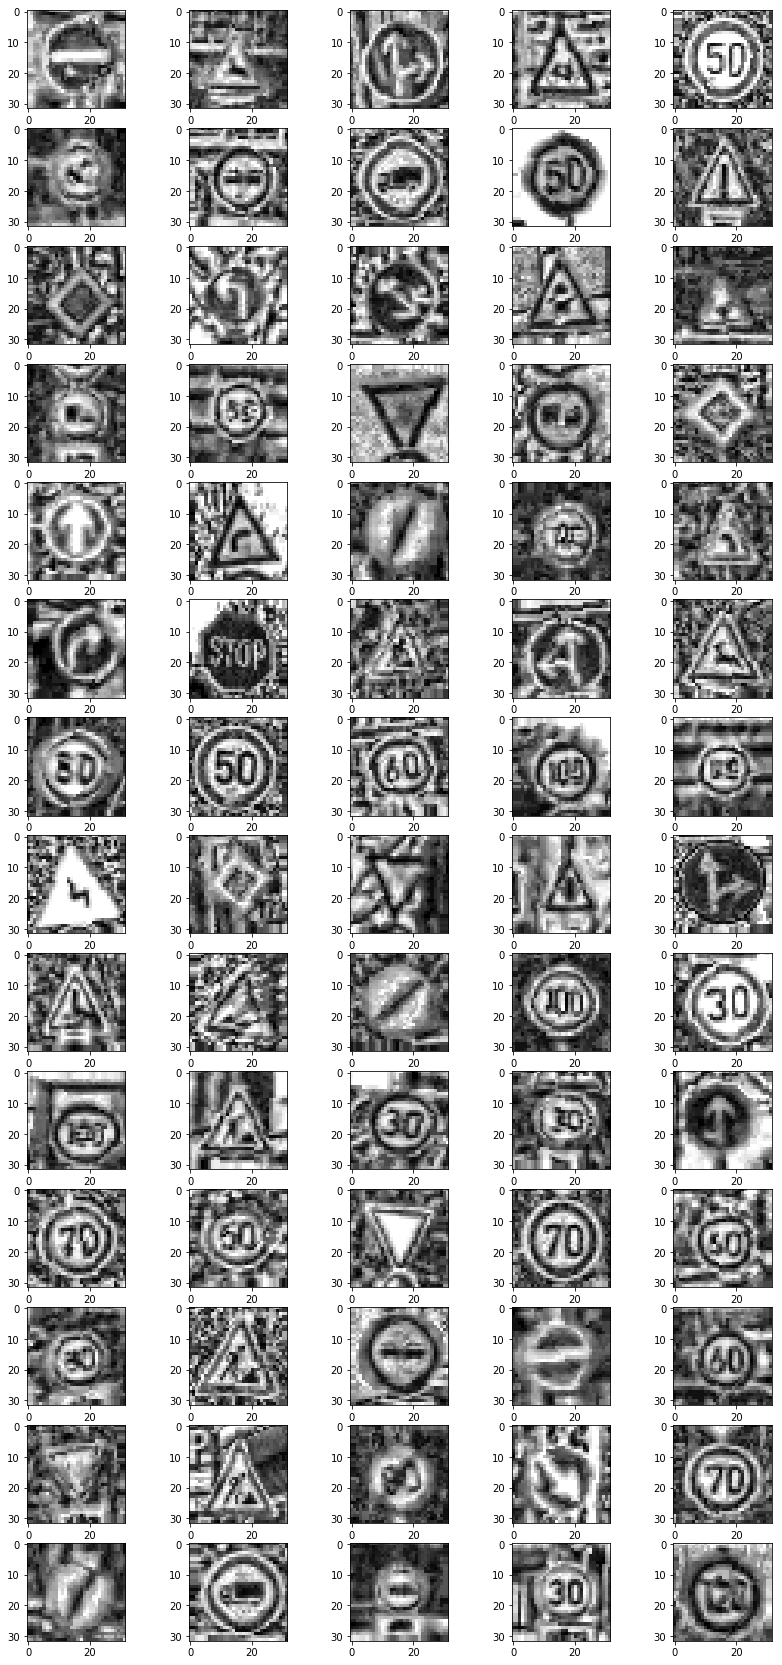

In [246]:
plt.figure(figsize=(14,30))
for i in range(70):
    plt.subplot(14,5,i+1)
    plt.imshow(X_train_input[(i+1)*100+40000].reshape(32,32),cmap='gray')

### Model Architecture

In [247]:
import os
MODEL = os.path.join(os.path.dirname('./'),'MODEL_YUV_norm_AdHist_Augment_Cv1amd')
if not os.path.exists(MODEL):
    os.mkdir(MODEL)


In [248]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten
import numpy as np

EPOCHS = 50
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)


def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0.0
    sigma = np.sqrt(2.0 / BATCH_SIZE)         

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(16), name='conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x16. Output = 14x14x16.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
        
    # SOLUTION: Dropout.
    conv1 = tf.nn.dropout(conv1, keep_prob)
        
        
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 32), mean = mu, stddev = sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(32), name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Dropout.
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    
    # SOLUTION: Layer 3-1: Convolutional. Output = 3x3x64
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma), name='conv3_W')
    conv3_b = tf.Variable(tf.zeros(64), name='conv3_b')
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Dropout.
    conv3 = tf.nn.dropout(conv3, keep_prob)

    
    # SOLUTION: Flatten. Input = 3x3x64 Output = 576. 7x7X32  1568
    fc0_1   = flatten(conv3)                
#    fc0_2   = flatten(conv2)                
#    fc0     = tf.concat([fc0_1, fc0_2],1)


    # SOLUTION: Layer 3: Fully Connected. Input = 576. Output = 256.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(576, 256), mean = mu, stddev = sigma), name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(256), name='fc1_b')
    fc1   = tf.matmul(fc0_1, fc1_W) + fc1_b                    # <===
    """    
    # SOLUTION: Dropout.
    fc1 = tf.nn.dropout(fc1, keep_prob)
    """
    # SOLUTION: Layer 4: Fully Connected. Input = 256. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 43), mean = mu, stddev = sigma), name='fc2_W')
    fc2_b  = tf.Variable(tf.zeros(43), name='fc2_b')
    logits = tf.matmul(fc1, fc2_W) + fc2_b             #  <==== fc1
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [249]:
# Check before process
model_save_name = '/Trafic_Sign_Classifier_001_YUV_norm_AdHist_Augment_Cv1amd_{}.ckpt'


In [250]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())                                       # Comment out when Restore checkpoint  
#    saver.restore(sess, tf.train.latest_checkpoint(MODEL))
    num_examples = len(X_train_input)                               # <===
    
    print("Training...")
    print()
    for i in range(EPOCHS):                                   # if start from interupted epoch, (EPOCHS) => (XXX:EPOCHS)
        X_train, y_train = shuffle(X_train_input, y_train_input)   # <===
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        
        validation_accuracy = evaluate(X_valid_input, y_valid_input)                          # <===
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, MODEL + model_save_name.format(i)) 
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.881

EPOCH 2 ...
Validation Accuracy = 0.908

EPOCH 3 ...
Validation Accuracy = 0.930

EPOCH 4 ...
Validation Accuracy = 0.934

EPOCH 5 ...
Validation Accuracy = 0.940

EPOCH 6 ...
Validation Accuracy = 0.951

EPOCH 7 ...
Validation Accuracy = 0.950

EPOCH 8 ...
Validation Accuracy = 0.947

EPOCH 9 ...
Validation Accuracy = 0.956

EPOCH 10 ...
Validation Accuracy = 0.952

EPOCH 11 ...
Validation Accuracy = 0.959

EPOCH 12 ...
Validation Accuracy = 0.965

EPOCH 13 ...
Validation Accuracy = 0.953

EPOCH 14 ...
Validation Accuracy = 0.956

EPOCH 15 ...
Validation Accuracy = 0.964

EPOCH 16 ...
Validation Accuracy = 0.961

EPOCH 17 ...
Validation Accuracy = 0.965

EPOCH 18 ...
Validation Accuracy = 0.969

EPOCH 19 ...
Validation Accuracy = 0.961

EPOCH 20 ...
Validation Accuracy = 0.964

EPOCH 21 ...
Validation Accuracy = 0.961

EPOCH 22 ...
Validation Accuracy = 0.961

EPOCH 23 ...
Validation Accuracy = 0.966

EPOCH 24 ...
Validation Accura

In [251]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(MODEL))

    test_accuracy = evaluate(X_test_input, y_test_input)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./MODEL_YUV_norm_AdHist_Augment_Cv1amd/Trafic_Sign_Classifier_001_YUV_norm_AdHist_Augment_Cv1amd_49.ckpt
Test Accuracy = 0.952


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

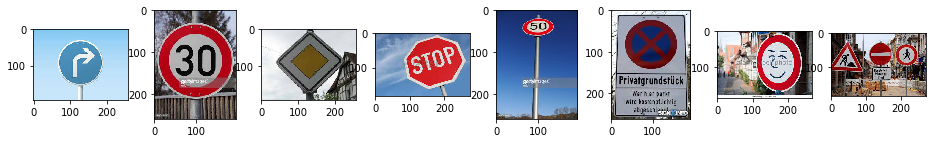

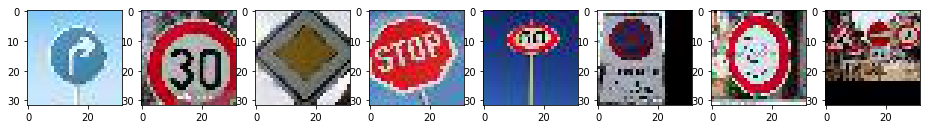

In [78]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os, glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

path = "/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/09. Project (Traffic Sign Classifier)/CarND-Traffic-Sign-Classifier-Project/Downloaded_TraficSigns"
#listdir = os.listdir(path)                                  
image_filenames = glob.glob(os.path.join(path, '*.*'))
image_filenames.sort()

img = []
for i in range(len(image_filenames)):
    img_file = os.path.join(path,image_filenames[i])
    img.append(plt.imread(img_file))

plt.figure(figsize=(16,2))
for i in range(1,9):
    plt.subplot(1,8,i)
    plt.imshow(img[i-1])

path_mod = '/home/tk/Self-Driving Car/1. Computer Vision and Deep Learning/09. Project (Traffic Sign Classifier)/CarND-Traffic-Sign-Classifier-Project/Downloaded_TraficSigns/Modified'
    
img32 = glob.glob(os.path.join(path_mod,'*.*'))
img32.sort()

plt.figure(figsize=(16,2))
for i in range(1,9):
    plt.subplot(1,8,i)
    plt.imshow(plt.imread(img32[i-1]))


### Predict the Sign Type for Each Image

In [79]:
img32_ = []
for i in range(len(img32)):
    img32_.append(plt.imread(img32[i]))
img32_np = np.array(img32_)
print(img32_np.shape)

(8, 32, 32, 3)


In [80]:
from skimage import exposure

# Conver to YUV 1 channel(Y)
YUV_converter = np.array([.299, .587, .114]).reshape(3,1)

img32_np_x3 = img32_np.reshape((-1,3))
img32_np_x1 = img32_np_x3.dot(YUV_converter)
img32_np_x1 = (img32_np_x1 / 255.0).astype(np.float32)
img32_np_x1 = img32_np_x1.reshape(-1,32,32)
img32_np_YUV_his = np.zeros_like(img32_np_x1)
for i in range(img32_np_x1.shape[0]):
    img32_np_YUV_his[i] = exposure.equalize_adapthist(img32_np_x1[i])
img32_np_YUV_32x32x1 = img32_np_YUV_his.reshape((-1,32,32,1))
print(img32_np_YUV_32x32x1.shape)                                           # ===> img32_np_YUV_32x32x1


(8, 32, 32, 1)


/home/tk/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [252]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(MODEL))

    probabilities = logits
    prob = probabilities.eval(feed_dict={x: img32_np_YUV_32x32x1, keep_prob: 1.0}, session=sess)
#    print("Probabilities", prob)
    prediction = tf.argmax(prob,1)
    pred = prediction.eval(feed_dict={x: img32_np_YUV_32x32x1, keep_prob: 1.0}, session=sess)
    print("Prediction", pred)


INFO:tensorflow:Restoring parameters from ./MODEL_YUV_norm_AdHist_Augment_Cv1amd/Trafic_Sign_Classifier_001_YUV_norm_AdHist_Augment_Cv1amd_49.ckpt
Prediction [ 2  2 12  2  2  5  2  2]


### Analyze Performance

In [253]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(MODEL))

    probabilities = logits
    prob = probabilities.eval(feed_dict={x: img32_np_YUV_32x32x1, keep_prob: 1.0}, session=sess)
    values, indices = sess.run(tf.nn.top_k(prob, k=5))
    print(values)
    print(indices)


INFO:tensorflow:Restoring parameters from ./MODEL_YUV_norm_AdHist_Augment_Cv1amd/Trafic_Sign_Classifier_001_YUV_norm_AdHist_Augment_Cv1amd_49.ckpt
[[  8.9858284    6.85372162   5.97668314   5.60657454   5.18706846]
 [ 12.23233986   9.53502369   8.8806715    6.11559629   5.96098995]
 [ 12.28891277  11.5028801    9.85716152   9.38225651   7.42106438]
 [ 11.25574017   9.7454195    9.17197704   6.18659735   5.9888649 ]
 [ 10.22087479   6.54996967   5.4158783    5.3261857    5.32289505]
 [  6.89192247   6.27291727   6.24212265   5.41399717   4.66447067]
 [ 13.9995079    8.7894783    8.68567848   8.03077984   7.28528452]
 [ 12.56967449  10.69335747   9.38671207   7.11465073   7.02316856]]
[[ 2 12  1  7  4]
 [ 2 21 38 14  8]
 [12  2 21 38 30]
 [ 2 14 38  8 21]
 [ 2  4 38 21  1]
 [ 5  2 40  8 12]
 [ 2 21 38  7 14]
 [ 2 14 38  7 30]]


In [254]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import glob

def plot_image(values, indices, index):
    # Images
    img = plt.imread(path + '/sign{}'.format(index) + '.jpeg')
    img_mod = plt.imread(path_mod + '/sign{}'.format(index)+'_mod' + '.jpeg')
        
    # Prepare the grid
    plt.figure(figsize = (6, 2))
    gridspec.GridSpec(2, 2)
    
    # Plot original image
    plt.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
    plt.imshow(img)
    plt.axis('off')

    # Plot processed image
    plt.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
    plt.imshow(img_mod, cmap='gray')
    plt.axis('off')

    # Plot predictions
    plt.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    plt.barh(np.arange(5)+.5, values[index], align='center')
    plt.yticks(np.arange(5)+.5, signnames[indices[index].astype(int)])
    print(indices[index].astype(int))
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')
    
    plt.show()

In [255]:
import pandas as pd
signnames = pd.read_csv('./signnames.csv').values[:,1]
print(signnames)

actuals = ['33', '1', '12', '14', '2','Not in category','Not in category','Not in category']

actual_labels = []
for i in range(len(actuals)):
    if (actuals[i]).isdigit():
        label_temp = signnames[int(actuals[i])]
    else:
        label_temp = actuals[i]
    actual_labels.append(label_temp)



['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road' 'Slippery road'
 'Road narrows on the right' 'Road work' 'Traffic signals' 'Pedestrians'
 'Children crossing' 'Bicycles crossing' 'Beware of ice/snow'
 'Wild animals crossing' 'End of all speed and passing limits'
 'Turn right ahead' 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']


Turn right ahead
[ 2 12  1  7  4]


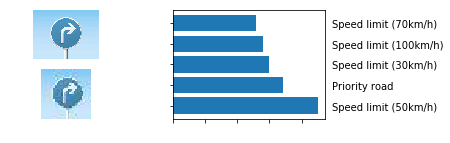

---------------------------------------------------------------------------------
Speed limit (30km/h)
[ 2 21 38 14  8]


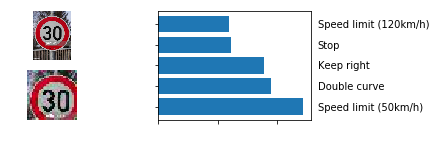

---------------------------------------------------------------------------------
Priority road
[12  2 21 38 30]


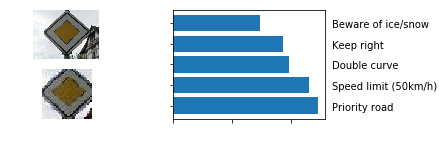

---------------------------------------------------------------------------------
Stop
[ 2 14 38  8 21]


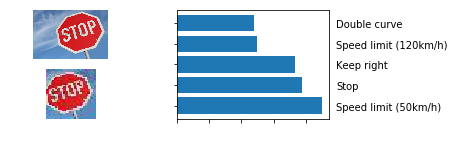

---------------------------------------------------------------------------------
Speed limit (50km/h)
[ 2  4 38 21  1]


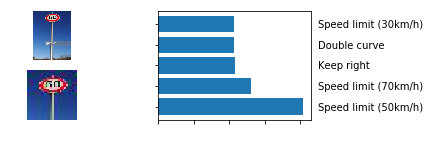

---------------------------------------------------------------------------------
Not in category
[ 5  2 40  8 12]


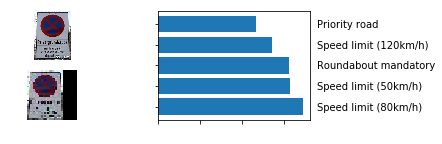

---------------------------------------------------------------------------------
Not in category
[ 2 21 38  7 14]


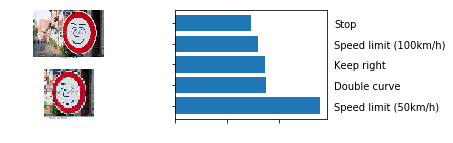

---------------------------------------------------------------------------------
Not in category
[ 2 14 38  7 30]


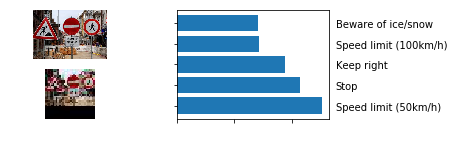

---------------------------------------------------------------------------------


In [256]:
# image index = 0-7
for i in range(8):
    print(actual_labels[i])
    plot_image(values, indices, i)
    print('---------------------------------------------------------------------------------')

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [268]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [269]:
import matplotlib.pyplot as plt
%matplotlib inline

outputFeatureMap(X_train_input[10000], conv2_W, activation_min=-1, activation_max=-1, plt_num=16)

NameError: name 'conv2_W' is not defined